In [2]:
!pip install pymupdf

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.0/20.0 MB 44.9 MB/s eta 0:00:00


In [3]:
!pip install --upgrade openai

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 644.4/644.4 kB 8.7 MB/s eta 0:00:00
  Attempting uninstall: openai
    Found existing installation: openai 1.70.0
    Uninstalling openai-1.70.0:
      Successfully uninstalled openai-1.70.0


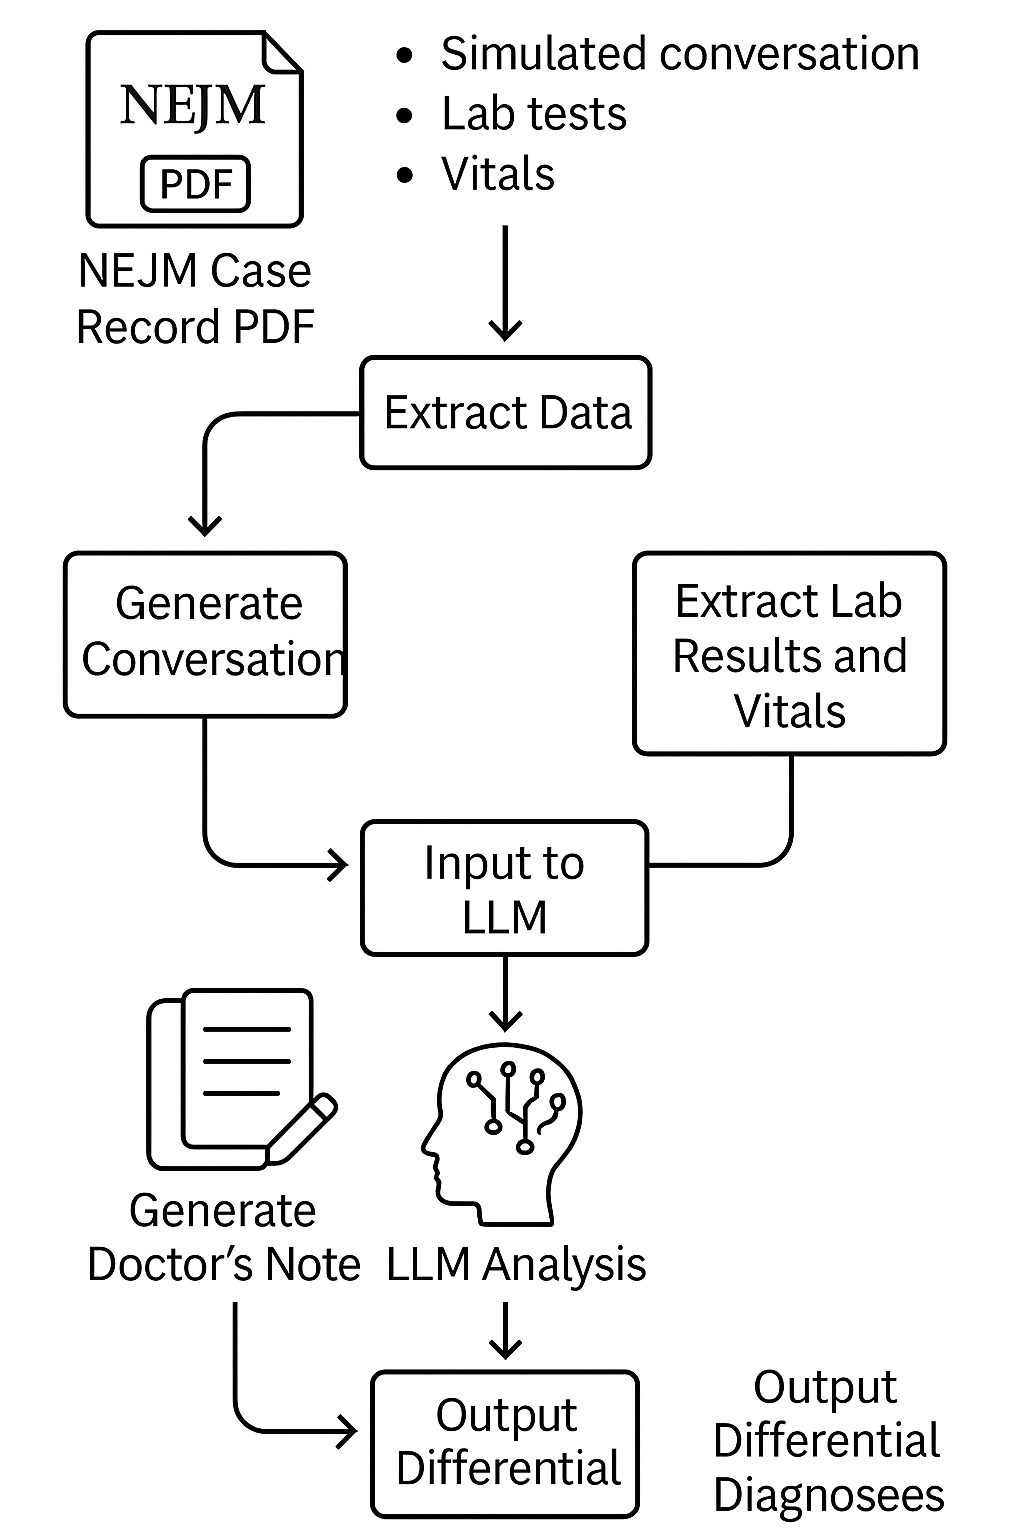

# **Simulated Conversation between a Doctor and a Patient**


---




- **Input** = NEJM Case Record
- **Output** = Simulated Conversation between a Doctor & Patient based on the NEJM case record

In [4]:
# Import necessary libraries
from google.colab import files
import fitz  # PyMuPDF
import io
import openai
import getpass

# Securely input your OpenAI API key
openai.api_key = getpass.getpass("Enter your OpenAI API key: ")

def upload_pdf():
    """Uploads a PDF file and returns its text content."""
    uploaded = files.upload()
    for filename in uploaded:
        print('User uploaded file "{name}" with length {length} bytes'.format(
            name=filename, length=len(uploaded[filename])))
        open_pdf_file = io.BytesIO(uploaded[filename])
        document = fitz.open(stream=open_pdf_file, filetype='pdf')
        text = ''
        for page in document:
            text += page.get_text()
        return text
    return None

def generate_conversation(text):
    """Generates a conversation based on the text using OpenAI's GPT."""
    prompt = f"""
    Transform the following medical case into a simulated conversation between a doctor and a patient:
    {text}
    The conversation should naturally flow with the doctor asking questions based on the symptoms and medical history provided, and the patient responding accordingly. Avoid including direct diagnoses or medical conclusions in the dialogue.
    """
    response = openai.chat.completions.create(
        model="gpt-3.5-turbo",
        messages=[{"role": "user", "content": prompt}],
        max_tokens=1000,
        temperature=0.7,
    )
    return response.choices[0].message.content.strip()

# Main execution flow
pdf_text = upload_pdf()
if pdf_text:
    conversation = generate_conversation(pdf_text)
    print("Generated Conversation:\n", conversation)
else:
    print("No PDF content to process.")


Enter your OpenAI API key: ··········


Saving NEJMcpc2312735.pdf to NEJMcpc2312735.pdf
User uploaded file "NEJMcpc2312735.pdf" with length 432461 bytes
Generated Conversation:
 Doctor: Hello, thank you for coming in today. I see that you've been experiencing insomnia, anxiety, painful nipples, decreased appetite, and mild headaches. Can you tell me more about how you've been feeling since giving birth?

Patient: Yes, Doctor. I have been having trouble sleeping and feeling anxious and nervous since the birth of my baby. I also noticed that my blood pressure has been high.

Doctor: It sounds like you've been dealing with a lot since giving birth. Have you been experiencing any intrusive thoughts or feeling overwhelmed?

Patient: Yes, I have been having intrusive thoughts about harming my baby. They started after delivery and have been causing me a lot of distress. I also feel overwhelmed and sometimes feel like I can't handle being a mother.

Doctor: I'm sorry to hear that you're going through this. It's important to address 

# **Doctor's Note**


---



- **Input** = Above simulated conversation that is stored in the variable "conversation"
- **Output** = The note that a doctor would generate at the end of the conversation

In [5]:
import openai

def generate_doctors_note(conversation):
    """
    Generate a doctor's note based on the simulated conversation.
    """
    prompt = f"""
    Based on the following conversation between a doctor and a patient, summarize the key medical insights and suggest next steps:
    Conversation:
    {conversation}

    Summary Note:
    """
    # Changed prompt to messages
    response = openai.chat.completions.create(
        model="gpt-4",
        messages=[{"role": "user", "content": prompt}],
        max_tokens=150,
        temperature=0.3,
        top_p=1.0,
        frequency_penalty=0.0,
        presence_penalty=0.0
    )
    return response.choices[0].message.content.strip() # Access message content


doctors_note = generate_doctors_note(conversation)
print("Doctor's Note:", doctors_note)

Doctor's Note: The patient has been experiencing symptoms of insomnia, anxiety, painful nipples, decreased appetite, mild headaches, and high blood pressure since giving birth. She has also been having intrusive thoughts about harming her baby, causing her distress and feelings of being overwhelmed. She has not previously disclosed these thoughts due to fear of her baby being taken away. The doctor suggested exploring therapy and medication options as a starting point for treatment. The patient is willing to seek help to manage her symptoms and intrusive thoughts. The next steps would involve discussing specific therapy and medication options, and creating a supportive treatment plan that prioritizes the patient's mental health.


# **Differential Diagnosis based on Simulated Conversation**
(Without Doctor's Note)

In [6]:
def get_diagnosis(conversation):
    prompt = f"""
    Medical Case Summary based on the simulated conversation:
    {conversation}

    Task:
    You are a medical expert asked to provide a differential diagnosis based on the conversation above. Indicate clearly which conditions could be life-threatening by prefixing them with '🚨'. For each potential condition:
    - Start with the diagnosis name and confidence level in the format: "Diagnosis X: [Condition] (Confidence level: XX%)"
    - Follow with a reasoning in a new line starting with "Reasoning:"
    - List the next steps as bullet points under "Next Steps:", only after the last condition.

    Provide the top differential diagnoses in the structured format specified above.
    """
    response = openai.chat.completions.create(
        model="gpt-4",
        messages=[{"role": "user", "content": prompt}],
        max_tokens=1000,
        temperature=0.3
    )
    return response.choices[0].message.content.strip()

# Main execution flow (assuming conversation variable is already defined)
if conversation:
    diagnosis = get_diagnosis(conversation)
    print("Generated Differential Diagnosis:\n", diagnosis)
else:
    print("No conversation content to process.")

Generated Differential Diagnosis:
 Diagnosis 1: Postpartum Depression (Confidence level: 85%)
Reasoning: 
The patient has recently given birth and is experiencing symptoms such as insomnia, anxiety, decreased appetite, and intrusive thoughts of harming her baby. These are all common symptoms of postpartum depression. The patient's fear of her baby being taken away if she discloses these thoughts is also indicative of the guilt and shame often associated with this condition.

Diagnosis 2: Postpartum Anxiety (Confidence level: 70%)
Reasoning: 
While postpartum depression and anxiety often co-occur, it's possible that the patient's primary issue is anxiety. Her symptoms of insomnia, high blood pressure, and feeling overwhelmed and nervous could be indicative of this condition. 

Diagnosis 3: Postpartum Psychosis 🚨 (Confidence level: 50%)
Reasoning: 
While less common than postpartum depression or anxiety, postpartum psychosis is a severe and life-threatening condition that can cause mothe

# **Differential Diagnosis based on Simulated Conversation + Doctor's Note**


---



In [8]:
def get_diagnosis(conversation, doctors_note):
    prompt = f"""
    Medical Case Summary based on the simulated conversation and doctor's note:
    Conversation:
    {conversation}

    Doctor's Note:
    {doctors_note}

    Task:
    You are a medical expert asked to provide a differential diagnosis based on the information above. Indicate clearly which conditions could be life-threatening by prefixing them with '🚨'. For each potential condition:
    - Start with the diagnosis name and confidence level in the format: "Diagnosis X: [Condition] (Confidence level: XX%)"
    - Follow with a reasoning in a new line starting with "Reasoning:"
    - List the next steps as bullet points under "Next Steps:", only after the last condition.

    Provide the top differential diagnoses in the structured format specified above.
    """
    response = openai.chat.completions.create(
        model="gpt-4",
        messages=[{"role": "user", "content": prompt}],
        max_tokens=1000,
        temperature=0.3
    )
    return response.choices[0].message.content.strip()

# Example usage of the function (assuming 'conversation' and 'doctors_note' variables are already defined)
if conversation and doctors_note:
    diagnosis = get_diagnosis(conversation, doctors_note)
    print("Generated Differential Diagnosis:\n", diagnosis)
else:
    print("No conversation or doctor's note content to process.")

Generated Differential Diagnosis:
 Diagnosis 1: Postpartum Depression (Confidence level: 90%)
Reasoning: 
The patient's symptoms of insomnia, anxiety, decreased appetite, and feelings of being overwhelmed, coupled with intrusive thoughts about harming her baby, are indicative of postpartum depression. This condition often develops after childbirth and can include severe mood swings, difficulty bonding with the baby, and thoughts of harming oneself or the baby.

Diagnosis 2: Postpartum Anxiety (Confidence level: 80%)
Reasoning: 
Postpartum anxiety is a condition that can occur after childbirth and is characterized by excessive worry, restlessness, and intrusive thoughts. The patient's symptoms of anxiety, insomnia, and high blood pressure could be indicative of this condition.

Diagnosis 3: 🚨 Postpartum Psychosis (Confidence level: 70%)
Reasoning: 
Postpartum psychosis is a rare but serious mental health disorder that can occur after childbirth. Symptoms can include severe mood swings, 

| Criteria                  | Without Doctor's Note                             | With Doctor's Note                               |
|---------------------------|--------------------------------------------------|-------------------------------------------------|
| **Specificity of Diagnoses** | May produce more general or broad diagnoses.     | Leads to more specific diagnoses based on detailed patient context. |
| **Accuracy and Relevance**   | Diagnoses may lack context, affecting relevance. | Enhanced accuracy and relevance due to additional contextual information. |
| **Confidence Levels**        | Lower confidence in diagnoses due to limited data. | Higher confidence levels as the note adds supportive details. |
| **Quality of Reasoning**     | Generic reasoning based mostly on visible symptoms. | Detailed and tailored reasoning, improving diagnostic explanation quality. |


This structured approach helps in assessing the real impact of incorporating a doctor's note into the diagnostic process using the model.